# One-class Support Vector Machine Detector (OCSVM)

----

**Created by**:

- **Author**: Dr. Saad Laouadi
- **Date**: 17/08/2024

This notebook was created by dr. Saad Laouadi on August 17th, 2024 as part of a series on anomaly detection algorithms. The content is designed for researchers, data scientists, and practitioners interested in applying the One Class Support Vector Machine algorithm to identify anomalies in diverse datasets.

**Copyright**

**© 2024 Dr. Saad Laouadi. All rights reserved.**

---

## Table of Contents
1. [Objective](#Objective)
2. [Prerequisites](#Prerequisites)
3. [Installing PyTorch](#installing-pytorch)
4. [Theoretical Background of AE-1SVM-OD](#theoretical-background-of-ae-1svm-od)
   - 4.1. [Introduction](#introduction)
   - 4.2. [Core Components](#core-components)
     - 4.2.1. [Auto-Encoder Architecture](#auto-encoder-architecture)
     - 4.2.2. [One-Class Support Vector Machine](#one-class-support-vector-machine)
     - 4.2.3. [Latent Space Representation](#latent-space-representation)
     - 4.2.4. [Decision Function](#decision-function)
5. [Theoretical Underpinnings](#theoretical-underpinnings)
   - 5.1. [Manifold Learning and Representation Theory](#manifold-learning-and-representation-theory)
   - 5.2. [Statistical Learning Theory](#statistical-learning-theory)
   - 5.3. [Information Theory](#information-theory)
6. [Mathematical Framework](#mathematical-framework)
   - 6.1. [Auto-Encoder Model](#auto-encoder-model)
   - 6.2. [One-Class SVM Formulation](#one-class-svm-formulation)
   - 6.3. [Decision Function](#decision-function)
   - 6.4. [Anomaly Score Calculation](#anomaly-score-calculation)
7. [Computational Complexity](#computational-complexity)
   - 7.1. [Auto-encoder Training Complexity](#auto-encoder-training-complexity)
   - 7.2. [1SVM Training Complexity](#1svm-training-complexity)
   - 7.3. [Inference Complexity](#inference-complexity)
8. [Using AE-1SVM for Outlier Detection Using PyOD Framework](#using-ae-1svm-for-outlier-detection-using-pyod-framework)
   - 8.1. [Key Parameters of AE-1SVM](#key-parameters-of-ae-1svm)
   - 8.2. [Methods in AE-1SVM](#methods-in-ae-1svm)
   - 8.3. [Training Workflow for AE-1SVM](#training-workflow-for-ae-1svm)
9. [Practical Example of AE-1SVM System with Simulated Data](#practical-example-of-ae-1svm-system-with-simulated-data)
10. [Real-World Example](#real-world-example)
   - 10.1. [AE-1SVM Outlier Detection Workflow](#ae-1svm-outlier-detection-workflow)
   - 10.2. [Configuring the AE-1SVM](#configuring-the-ae-1svm)
11. [Training AE-1SVM as an Unsupervised Problem](#training-ae-1svm-as-an-unsupervised-problem)

## Objectives

The primary objective of this notebook is to provide a comprehensive exploration of the **One Class Support Vector Machine Outlier Detector (OC-SVM-OD)** algorithm, encompassing its theoretical foundations, practical implementation, and performance evaluation. Specifically, this notebook aims to:

1. **Elucidate the Theoretical Framework**: Present a detailed explanation of the underlying principles of OC-SVM and its application to outlier detection, including the concepts of support vectors, kernel functions, and the optimization problem central to OC-SVM.

2. **Demonstrate Practical Implementation**: Guide readers through the step-by-step process of implementing OC-SVM-OD using popular machine learning libraries, with a focus on code efficiency and best practices.

3. **Explore Hyperparameter Tuning**: Investigate the impact of various hyperparameters, particularly the kernel choice, nu parameter, and kernel coefficients, on the OC-SVM-OD's performance, providing insights into optimal configuration for different types of datasets.

4. **Analyze Performance**: Evaluate OC-SVM-OD's effectiveness in identifying outliers using both synthetic and real-world datasets, employing appropriate evaluation metrics and visualization techniques.

5. **Compare with Other Techniques**: Benchmark OC-SVM-OD against other outlier detection methods (e.g., Isolation Forest, LOF) to highlight its strengths and potential limitations.

6. **Discuss Real-World Applications**: Present case studies demonstrating OC-SVM-OD's applicability in various domains, such as network intrusion detection, fraud detection, or identifying anomalies in industrial processes.

7. **Address Challenges and Limitations**: Discuss potential challenges in implementing OC-SVM-OD, including scalability issues for large datasets, the impact of the curse of dimensionality, and strategies for handling these challenges.

8. **Explore Extensions and Variants**: Introduce readers to advanced topics related to OC-SVM-OD, such as online learning variants or ensemble methods that incorporate OC-SVM.

By the end of this notebook, readers will have gained a thorough understanding of the One Class Support Vector Machine Outlier Detector, equipped with the knowledge and practical skills to apply this algorithm effectively in their own anomaly detection tasks across diverse datasets and domains.

### Prerequisites

This notebook assumes a foundational understanding of Python tools for data manipulation and processing. The following prerequisites will help you get the most out of this material:

1. **Data Manipulation**:
   - Familiarity with reading and writing data using libraries such as **Pandas** and **NumPy**.

2. **Machine Learning Workflow**:
   - Prior experience with the **Scikit-learn** library, including:
     - Preprocessing techniques like scaling and normalization.
     - Splitting data into training and test sets using tools like `train_test_split`.

3. **Data Visualization**:
   - Proficiency in using plotting libraries such as **Matplotlib** and **Seaborn** for visualizing data and model results.

In [1]:
# ============================================================================================# 
#                                 Environment Setup
#  Here we import all the necessary modules and tools we will use through this notebook
# ============================================================================================# 
import os
import sys
import time
from collections import Counter

import numpy as np 
import pandas as pd
from scipy.io import arff

from pyod.utils.data import evaluate_print
from pyod.utils.example import visualize

from pyod.models.ocsvm import OCSVM

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import classification_report, roc_auc_score, precision_recall_curve, auc
from sklearn.metrics import precision_score, recall_score, f1_score

import matplotlib.pyplot as plt
import seaborn as sns

# The utils module is not an installable package, it is the same directory as this notebook
from utils import generate_data, visualize_data, apply_abod, apply_abod_advanced, precision_at_rank_n
from utils import grid_search_abod, hyperopt_objective, plot_outliers_vs_inliers
from utils import preprocess_pipeline

from suod_utils import generate_sample_data, evaluate_model, visualize_results

from pyod.models.suod import SUOD
from pyod.models.lof import LOF
from pyod.models.iforest import IForest
from pyod.models.copod import COPOD
from pyod.models.knn import KNN
from pyod.models.mcd import MCD
from pyod.models.ocsvm import OCSVM
from pyod.utils.utility import standardizer
from pyod.utils.data import generate_data, get_outliers_inliers, evaluate_print
from pyod.utils.example import visualize

from hyperopt import fmin, tpe, hp, Trials, STATUS_OK
from hyperopt.pyll.base import scope

def print_banner(sep, nchar, title):
    print(sep * nchar)
    print(title.center(nchar))
    print(sep * nchar)

# Configuration 
DATA_PATH = "../../datasets/HeartDisease/HeartDisease_withoutdupl_norm_44.arff"

> **⚠️ Important Notice:**
> 
> At the time of writing, some of the models are not available in the mature production version of `pyod` library, so if you did install that version and you got an error, or may need to replicate the examples in this notebook, you may need to install the development version of this livbrary. Run the next command to do that:

**Installing PYOD Development Version:**


```sh
pip install git+https://github.com/yzhao062/pyod.git@development
```

**To avoid any conflictions with other packages, it is best to install this library in a separate environment**.

# Theoretical Background of OC-SVM-OD

## 1. Introduction

One Class Support Vector Machine Outlier Detector (OC-SVM-OD) is an advanced unsupervised machine learning algorithm designed for robust anomaly detection. This approach is particularly effective in handling complex, high-dimensional datasets where traditional methods may fall short.

OC-SVM-OD leverages the power of Support Vector Machines to construct a decision boundary that encapsulates the majority of the data points, treating them as the "normal" class. Points that fall outside this boundary are considered potential anomalies. This method is especially useful in scenarios where anomalies are rare and diverse, making it challenging to model them explicitly.

The core principle of OC-SVM-OD lies in its ability to find a hyperplane in a high-dimensional feature space that separates the bulk of the data from the origin with maximum margin. This approach allows the algorithm to capture complex data structures while maintaining a clear decision boundary for anomaly classification.

## 2. Core Components

### 2.1 Support Vector Machine Architecture

The OC-SVM-OD algorithm consists of:

- A kernel function for mapping data to a high-dimensional feature space
- An optimization problem to find the maximal margin hyperplane that separates the data from the origin in the feature space
- Support vectors that define the decision boundary

### 2.2 Kernel Function

The kernel function is crucial in OC-SVM-OD as it allows the algorithm to operate in high-dimensional spaces without explicitly computing the coordinates of the data in that space. Common kernel functions include RBF (Radial Basis Function), polynomial, and sigmoid kernels.

### 2.3 Decision Function

The OC-SVM constructs a decision function that determines whether a point is an inlier or an outlier based on its position relative to the hyperplane in the feature space.

## 3. Theoretical Underpinnings

### 3.1 Statistical Learning Theory

OC-SVM-OD is grounded in statistical learning theory, particularly the principles of structural risk minimization and kernel methods. This provides a solid theoretical foundation for the algorithm's generalization capabilities and its ability to handle high-dimensional data.

### 3.2 Reproducing Kernel Hilbert Spaces

The concept of Reproducing Kernel Hilbert Spaces (RKHS) is fundamental to understanding OC-SVM-OD. It provides the mathematical framework for working in high-dimensional feature spaces induced by kernel functions.

### 3.3 Vapnik-Chervonenkis Theory

VC theory helps in understanding the generalization capabilities of **OCSVM-OD**, providing bounds on the expected risk and guiding the choice of hyperparameters.

## 4. Mathematical Framework

### 4.1 One-Class SVM Formulation

Given a set of training examples $\{x_1, ..., x_n\}$, the OC-SVM solves the following optimization problem:

$$\min_{w,\xi,\rho} \frac{1}{2}|w|^2 + \frac{1}{\nu n}\sum_{i=1}^n \xi_i - \rho$$

subject to $(w \cdot \phi(x_i)) \geq \rho - \xi_i$, $\xi_i \geq 0$

where $w$ is the normal vector to the hyperplane, $\xi_i$ are slack variables, $\rho$ is the margin, $\nu$ is a parameter controlling the trade-off between margin maximization and constraint violation, and $\phi$ is the kernel function.

### 4.2 Decision Function

The decision function for classifying a new point $x$ is:

$$f(x) = \text{sign}((w \cdot \phi(x)) - \rho)$$

### 4.3 Anomaly Score Calculation

The anomaly score $S$ for a data point $x$ can be calculated based on its distance from the decision boundary:

$$S(x) = -(w \cdot \phi(x)) + \rho$$

A higher score indicates a higher likelihood of $x$ being an anomaly.

## 5. Computational Complexity

The computational complexity of OC-SVM-OD can be divided into two phases:

- **Training**: $O(n^2)$ to $O(n^3)$, where $n$ is the number of training samples. This can vary based on the specific SVM implementation and optimization techniques used.
- **Inference**: $O(n_sv)$, where $n_sv$ is the number of support vectors. This makes the inference phase typically fast, suitable for real-time anomaly detection.

While the training phase can be computationally intensive, especially for large datasets, various optimization techniques and approximations can be employed to improve performance.

---

The OC-SVM-OD algorithm presents a powerful approach to anomaly detection, particularly effective in high-dimensional spaces and when normal behavior is well-defined but anomalies are diverse and unpredictable. Its ability to handle complex data structures while providing a clear decision boundary makes it a valuable tool in various domains, from cybersecurity to industrial process monitoring.

## Using OCSVM for Outlier Detection Using PyOD Framework

The `OCSVM` class from the `pyod.models.ocsvm` module is a wrapper around the scikit-learn implementation of One-Class SVM for anomaly detection. This model is particularly useful for estimating the support of a high-dimensional distribution and identifying outliers based on their deviation from this support.

### Key Parameters of OCSVM

- **kernel**: Specifies the kernel type to be used in the algorithm.
  - Type: `str` (default='rbf')
  - Options: `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`, `'precomputed'`, or a callable.
  - Example: `'rbf'` uses the Radial Basis Function kernel.

- **nu**: An upper bound on the fraction of training errors and a lower bound of the fraction of support vectors.
  - Type: `float` (default=0.5)
  - Range: `(0, 1]`

- **degree**: Degree of the polynomial kernel function.
  - Type: `int` (default=3)
  - Used only with the `'poly'` kernel.

- **gamma**: Kernel coefficient for `'rbf'`, `'poly'`, and `'sigmoid'` kernels.
  - Type: `float` (default='auto')
  - When `gamma='auto'`, it uses `1/n_features`.

- **coef0**: Independent term in kernel function.
  - Type: `float` (default=0.0)
  - Relevant for `'poly'` and `'sigmoid'` kernels.

- **tol**: Tolerance for stopping criterion.
  - Type: `float` (default=0.001)

- **shrinking**: Whether to use the shrinking heuristic.
  - Type: `bool` (default=True)

- **cache_size**: Size of the kernel cache in MB.
  - Type: `float` (default=200)

- **verbose**: Enable verbose output.
  - Type: `bool` (default=False)

- **max_iter**: Hard limit on iterations within solver.
  - Type: `int` (default=-1)

- **contamination**: The proportion of outliers in the dataset.
  - Type: `float` (default=0.1)
  - Range: `(0, 0.5)`

### Methods in OCSVM

- **fit()**: Trains the OCSVM model on the provided data.
  - **Parameters**:
    - `X`: The input data to train on (ndarray of shape `(n_samples, n_features)`).
    - `sample_weight` (optional): Per-sample weights.
  - **Returns**:
    - `self`: The fitted OCSVM instance.
  - **Example**:
    ```python
    ocsvm.fit(X_train)
    ```

- **predict()**: Predicts whether each sample is an outlier or not.
  - **Parameters**:
    - `X`: The input data to predict (ndarray of shape `(n_samples, n_features)`).
    - `return_confidence`: If `True`, also returns the confidence of the prediction.
  - **Returns**:
    - `outlier_labels`: Binary labels for each sample (0 for inliers, 1 for outliers).
    - `confidence` (optional): Confidence of the prediction (only returned if `return_confidence=True`).
  - **Example**:
    ```python
    y_pred = ocsvm.predict(X_test)
    ```

- **decision_function()**: Computes the anomaly scores for the input data.
  - **Parameters**:
    - `X`: The input data to score (ndarray of shape `(n_samples, n_features)`).
  - **Returns**:
    - `anomaly_scores`: The anomaly scores for each sample (ndarray of shape `(n_samples,)`). Higher scores indicate a higher likelihood of being an outlier.
  - **Example**:
    ```python
    outlier_scores = ocsvm.decision_function(X_test)
    ```

### Training Workflow for OCSVM

Here are the steps to train an OCSVM model:

1. **Import the OCSVM Class**: Start by importing the `OCSVM` class from `pyod.models.ocsvm`.
    ```python
    from pyod.models.ocsvm import OCSVM
    ```

2. **Initialize the OCSVM**: Create an instance of the OCSVM class with the desired parameters.
    ```python
    ocsvm = OCSVM(kernel='rbf', nu=0.5, gamma='auto', contamination=0.1)
    ```

3. **Train the Model**: Fit the model to the training data.
    ```python
    ocsvm.fit(X_train)
    ```

4. **Make Predictions**: Use the `predict` method to classify data as inliers or outliers.
    ```python
    y_pred = ocsvm.predict(X_test)
    ```

5. **Get Outlier Scores**: Retrieve the anomaly scores using the `decision_function`.
    ```python
    outlier_scores = ocsvm.decision_function(X_test)
    ```

The OCSVM model is a powerful tool for detecting outliers in high-dimensional data, especially when the data distribution is unknown.

> **Note**: For more detailed information, you can refer to the [pyod documentation](https://pyod.readthedocs.io/en/latest/pyod.models.html#module-pyod.models.ocsvm).

## Practical Example of OCSVM System with Simulated Data

In this section, we demonstrate the application of the One-Class SVM (OCSVM) system using simulated data. We will walk through the process of:

1. **Generating Sample Datasets**:
   - We start by creating or loading a synthetic dataset. This dataset will be used to train the OCSVM model and test its ability to detect outliers.

2. **Initializing the OCSVM Model**:
   - We configure the OCSVM model, setting up the kernel and other parameters. The model will use the chosen kernel function to estimate the support of the data distribution and identify outliers.

3. **Training the OCSVM Model**:
   - We train the OCSVM model on the generated dataset. The model learns the data distribution and identifies points that deviate significantly from this distribution as potential outliers.

4. **Evaluating the System's Performance**:
   - After training, we assess the model's performance in identifying outliers. We evaluate the results using metrics such as precision, recall, and ROC AUC to understand how well the model performs.

5. **Visualizing the Results**:
   - Finally, we visualize the results to gain insights into the detected outliers. Visualization helps in interpreting the model's decisions and understanding the characteristics of the identified anomalies.

This example will provide a practical and hands-on understanding of how OCSVM can be effectively utilized for outlier detection in various applications.

y_train has multiple classes: {np.float64(0.0), np.float64(1.0)}
y_test has multiple classes: {np.float64(0.0), np.float64(1.0)}

On Training Data:
OCSVM ROC:0.9826, precision @ rank n:0.9444

On Test Data:
OCSVM ROC:1.0, precision @ rank n:1.0


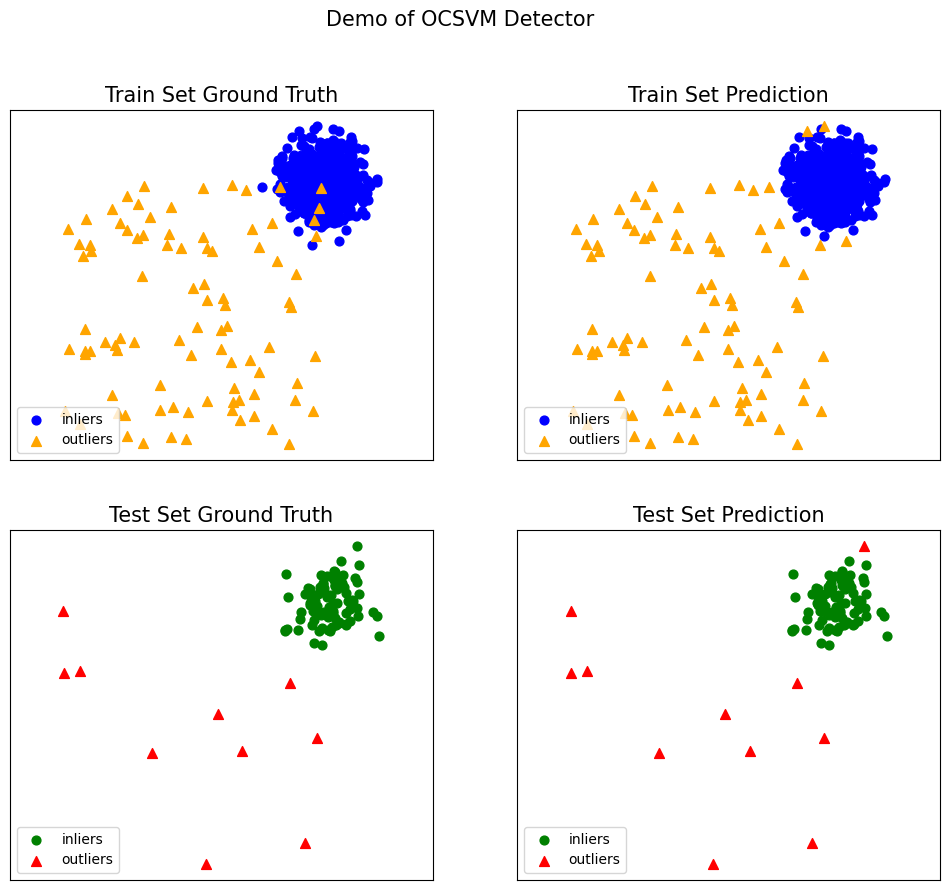

Process took 0.12160801887512207 seconds.


In [2]:
# Configuration
start = time.time()
if __name__ == "__main__":
    contamination = 0.1                          # Percentage of outliers
    n_train = 900                                # Number of training points
    n_test = 100                                 # Number of testing points

    # Generate synthetic data
    X_train, X_test, y_train, y_test = generate_sample_data(
        n_train=n_train, n_test=n_test, n_features=2, contamination=contamination, random_state=42
    )

    # Initialize the OCSVM model
    ocsvm = OCSVM(
        kernel='rbf',
        nu=0.5,
        gamma='auto',
        contamination=contamination
    )

    # Train the OCSVM model
    ocsvm.fit(X_train)

    # Get predictions
    y_train_pred = ocsvm.predict(X_train)
    y_test_pred = ocsvm.predict(X_test)

    # Get outlier scores
    y_train_scores = ocsvm.decision_function(X_train)
    y_test_scores = ocsvm.decision_function(X_test)

    # Evaluate the model
    evaluate_model('OCSVM', y_train, y_train_scores, y_test, y_test_scores)

    # Visualize the results
    visualize_results('OCSVM', X_train, y_train, X_test, y_test, y_train_pred, y_test_pred)

end = time.time()

print(f"Process took {end - start} seconds.")

---

## Real-World Example

In this section, we will utilize the heart disease dataset, which has been employed in previous algorithm examples. For more detailed information about the dataset, please refer to the [ABOD algorithm notebook](03-abod-algorithm.ipynb) or visit [this link](https://www.dbs.ifi.lmu.de/research/outlier-evaluation/DAMI/semantic/HeartDisease/HeartDisease_44.html).

### OCSVM Outlier Detection Workflow

To effectively leverage the OCSVM model for outlier detection, follow these comprehensive steps:

1. **Data Preprocessing**:
   - **Handle Missing Data**: Impute or remove missing values to maintain the dataset's integrity.
   - **Eliminate Duplicates**: Remove duplicate entries to prevent bias in the outlier detection process.
   - **Encode Categorical Features**: Convert categorical variables into numerical format using techniques like one-hot encoding or label encoding.
   - **Scale Features**: Normalize or standardize features to ensure a uniform scale across all input variables, which is crucial for the OCSVM model.
   - **Dimensionality Reduction** (Optional): Use techniques like PCA to reduce dimensionality, particularly when dealing with high-dimensional data.

2. **Applying the OCSVM Model**:
   - **Initialize the OCSVM Model**: Configure the OCSVM model, specifying parameters such as the kernel type, `nu`, and `gamma`.
   - **Train the Model**: Fit the OCSVM model to the preprocessed data. The model will learn the decision boundary that best separates the normal data points from the outliers.
   - **Prediction**: Use the trained OCSVM model to predict outliers in the dataset by calculating the decision function.

3. **Performance Evaluation**:
   - **Compute Metrics**: Evaluate the performance of the OCSVM model using metrics such as:
     - Precision
     - ROC AUC (Area Under the Receiver Operating Characteristic Curve)
     - Average Precision
   - **Cross-Validation**: Implement k-fold cross-validation to ensure robust performance assessment.

4. **Result Analysis and Interpretation**:
   - **Visualize Outliers**: Create scatter plots or other visualizations to represent detected outliers visually.
   - **Analyze Outlier Characteristics**: Identify common features or patterns among the detected outliers.
   - **Domain-Specific Interpretation**: Contextualize the detected outliers within the specific domain of the dataset.
   - **Comparative Analysis**: Compare the OCSVM model's results with traditional single-algorithm approaches if applicable.

5. **Model Refinement** (Optional):
   - **Hyperparameter Tuning**: Adjust the OCSVM model's parameters based on the initial results to improve performance.
   - **Kernel Selection**: Experiment with different kernel types (e.g., linear, polynomial, RBF) to find the most effective kernel for detecting outliers in the dataset.

> **Note**:  
> To reproduce the results in the following example, ensure you have downloaded the required dataset and saved it in an accessible directory. Additionally, verify that all necessary libraries and dependencies are installed in your environment.

### Configuring the OCSVM Model

In this example, I will configure the OCSVM model with the following parameters to detect outliers:

- **Kernel**: 
  - `RBF` (Radial Basis Function) kernel to capture non-linear relationships.
- **Nu Parameter**: 
  - `0.1`, controlling the fraction of training errors and support vectors.
- **Gamma**: 
  - `auto`, where the kernel coefficient is set to `1/n_features`.
- **Tolerance**: 
  - `0.001`, setting the tolerance for stopping criterion.
- **Contamination**: 
  - `0.1`, specifying the proportion of outliers in the dataset.

In [3]:
PRINT_MODEL_INFO = False 

# Function to load the dataset
def load_arff_data(filepath):
    """
    Load an ARFF file and return it as a pandas DataFrame.

    Parameters
    ----------
    filepath : str
        Path to the ARFF file.

    Returns
    -------
    data : DataFrame
        The loaded dataset.
    """
    data, meta = arff.loadarff(filepath)
    df = pd.DataFrame(data)
    
    # Convert byte strings to normal strings for categorical variables
    for column in df.select_dtypes([object]).columns:
        df[column] = df[column].str.decode('utf-8')
    
    return df

# Preprocess the dataset
def preprocess_heart_disease_data(df, target_name, scale=False):
    """
    Preprocess the Heart Disease dataset.

    Parameters
    ----------
    df : DataFrame
        The loaded dataset.
    target_name: str
        The target column name.

    Returns
    -------
    X : ndarray
        Feature matrix.
    y : ndarray
        Target vector (outlier labels).
    """
    X = df.drop(columns=[target_name])                                 
    y = df[target_name].apply(lambda x: 1 if x == 'yes' else 0).values

    if scale:
        scaler = StandardScaler()
        X_scaled = scaler.fit_transform(X)
    else:
        X_scaled = X
    
    return X_scaled, y

def stratify_split_data(X, y, test_size=0.1, random_state=42):
    """
    Split the data into training and testing sets with stratification.

    Parameters
    ----------
    X : ndarray
        Feature matrix.
    y : ndarray
        Target vector.
    test_size : float, optional
        Proportion of the dataset to include in the test split (default is 0.1).
    random_state : int, optional
        Seed for random number generation (default is 42).

    Returns
    -------
    X_train : ndarray
        Training feature matrix.
    X_test : ndarray
        Testing feature matrix.
    y_train : ndarray
        Training target vector.
    y_test : ndarray
        Testing target vector.
    """
    # Ensure that the test set has a similar distribution of classes as the full dataset
    X_train, X_test, y_train, y_test = train_test_split(X,
                                                        y, 
                                                        test_size=test_size,
                                                        random_state=random_state,
                                                        stratify=y)
    
    # Check class distribution
    print(f"Training set class distribution: {Counter(y_train)}")
    print(f"Test set class distribution: {Counter(y_test)}")
    
    return X_train, X_test, y_train, y_test

# Example of using the above functions with OCSVM
if __name__ == "__main__":
    # Load the dataset
    DATA_PATH = "../../datasets/HeartDisease/HeartDisease_withoutdupl_norm_44.arff"
    df = load_arff_data(DATA_PATH)

    # Preprocess the dataset
    X, y = preprocess_heart_disease_data(df, target_name='outlier', scale=True)

    # Optionally split the dataset if needed (although for unsupervised learning, this may not be required)
    X_train, X_test, y_train, y_test = stratify_split_data(X, y, test_size=0.1, random_state=42)

    # Initialize the OCSVM detector
    ocsvm = OCSVM(
        contamination=0.4444,                
        kernel='rbf',    
        nu=0.1,
        gamma='auto'
    )

    # Train the OCSVM model
    ocsvm.fit(X_train)

    # Get predictions
    y_train_pred = ocsvm.predict(X_train)
    y_test_pred = ocsvm.predict(X_test)
    
    # Get outlier scores
    y_train_scores = ocsvm.decision_function(X_train)
    y_test_scores = ocsvm.decision_function(X_test)

    # Evaluate the model
    evaluate_model('OCSVM', y_train_pred, y_train_scores, y_test_pred, y_test_scores)

    # Print the indices of the detected outliers
    outlier_indices = np.where(y_test_pred == 1)[0]
    print("Indices of the outliers:")
    print(outlier_indices)

    # Slice the data to have only the outliers
    outliers_only = X_test[outlier_indices, :]
    print(f"Number of detected outliers: {outliers_only.shape[0]}")

Training set class distribution: Counter({np.int64(0): 135, np.int64(1): 108})
Test set class distribution: Counter({np.int64(0): 15, np.int64(1): 12})
y_train has multiple classes: {np.int64(0), np.int64(1)}
y_test has multiple classes: {np.int64(0), np.int64(1)}

On Training Data:
OCSVM ROC:1.0, precision @ rank n:1.0

On Test Data:
OCSVM ROC:1.0, precision @ rank n:1.0
Indices of the outliers:
[ 0  1  3  7 11 12 13 15 16 17 18 20 21 25]
Number of detected outliers: 14


## Training OCSVM as an Unsupervised Problem

In this section, we’ll demonstrate how to train the OCSVM (One-Class SVM) model for unsupervised outlier detection. OCSVM is particularly effective in scenarios where the goal is to identify anomalies or outliers in the dataset without any labeled data. The model leverages the capabilities of Support Vector Machines (SVMs) to classify data points based on their proximity to the learned decision boundary, making it a robust choice for detecting outliers in complex datasets.

### Workflow Overview

1. **Data Preparation**:
    - We start by loading and preprocessing the dataset. Since the task is unsupervised, labels are not required for the training data.
    - The entire dataset will be used to train the OCSVM model, allowing it to learn the underlying patterns and structures of the data.

2. **Model Initialization**:
    - We initialize the OCSVM model with specified parameters such as the kernel type, nu value, and gamma.
    - These parameters can be adjusted to optimize the model's performance in detecting outliers, particularly in complex datasets.

3. **Training the OCSVM Model**:
    - The OCSVM model is trained on the entire dataset. During training, the model learns a decision boundary that separates the majority of the data points from the outliers.
    - Instances that the model classifies as significantly different from the majority are flagged as potential outliers.

4. **Outlier Detection**:
    - After training, the model predicts which instances in the dataset are outliers based on their distance from the learned decision boundary.
    - The identified outliers can be further analyzed to understand the reasons behind their classification as anomalies.

5. **Results Analysis**:
    - We will analyze the detected outliers by reviewing their characteristics and how they differ from the inliers.
    - Visualization techniques will be employed to illustrate the separation between inliers and outliers, providing insights into the model’s effectiveness.

(270, 14)
(270,)
outlier
no     150
yes    120
Name: count, dtype: int64
120
************************************************************************
                        Training and Prediction                         
************************************************************************
************************************************************************
                         Displaying Information                         
************************************************************************
Outliers detected: 120 out of 270
Indices of the outliers:
[  0   1   2   4   9  10  11  14  22  23  24  25  26  28  32  37  39  40
  41  42  43  44  45  46  50  52  60  62  63  65  66  67  69  75  76  78
  81  83  86  88  90 100 101 102 103 105 108 109 110 111 112 113 114 117
 119 120 121 123 124 125 134 135 142 143 147 152 153 155 156 157 158 160
 161 163 164 166 167 168 170 176 181 184 185 189 190 193 199 200 202 204
 205 206 208 210 212 214 216 217 220 221 222 223 226 227 229 

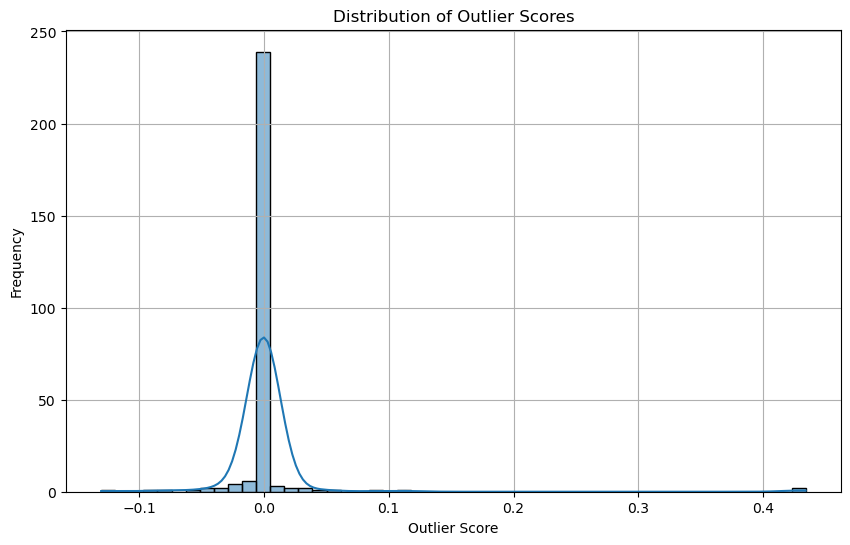

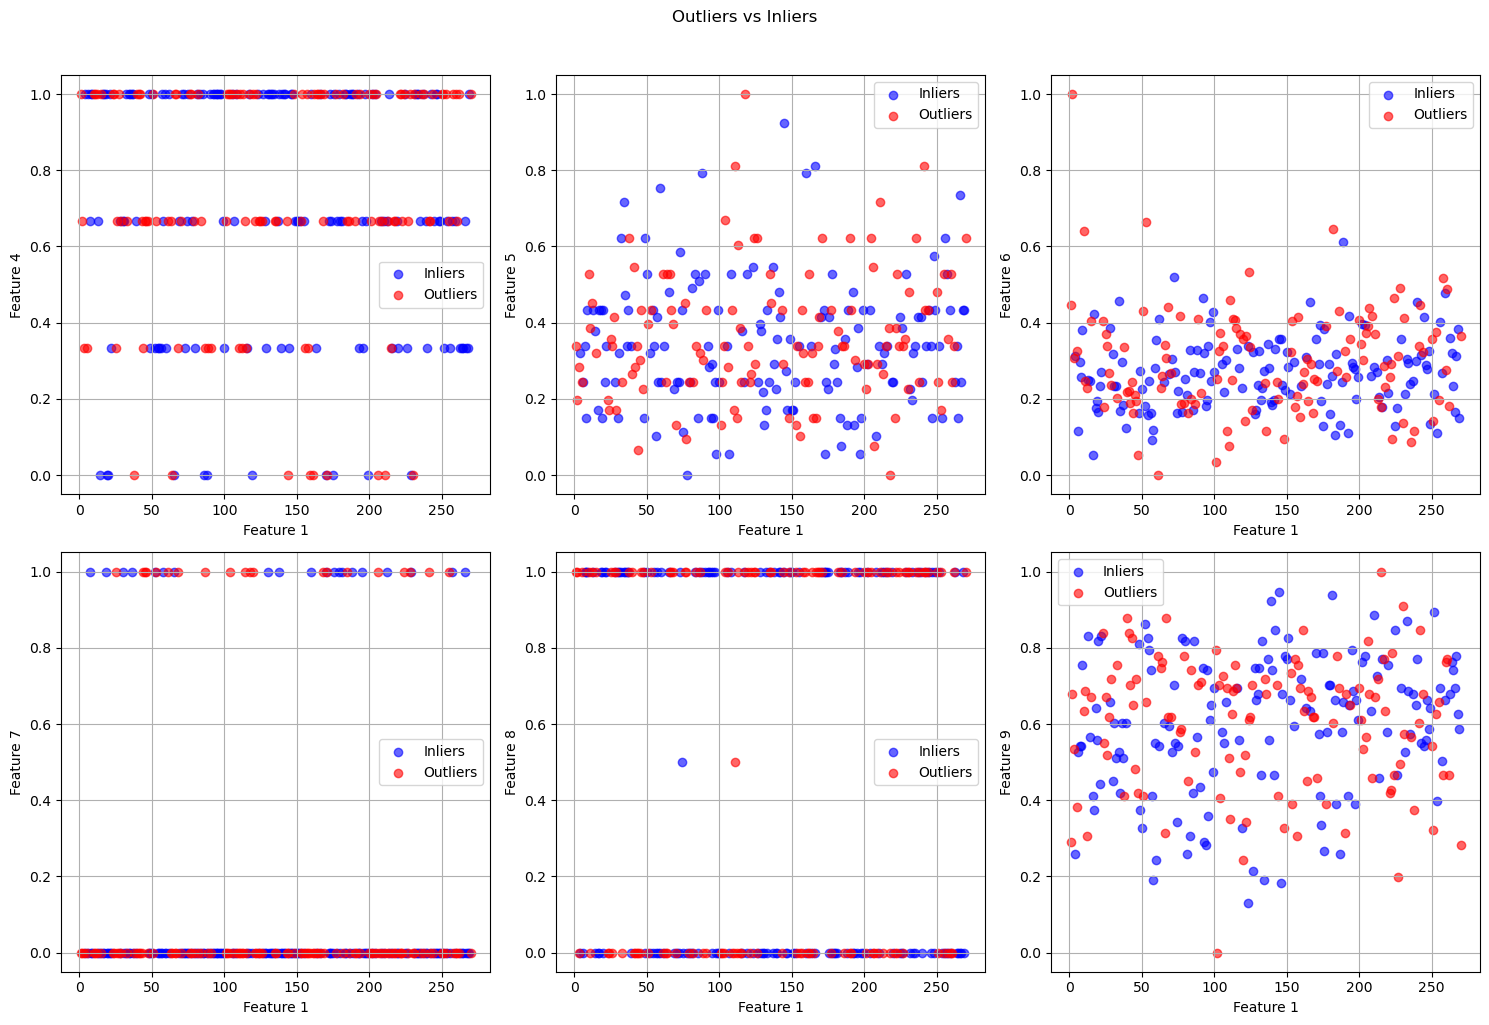

In [4]:
# Load and preprocess the dataset
df = load_arff_data(DATA_PATH)
X, y = preprocess_heart_disease_data(df, 'outlier')
print(X.shape)
print(y.shape)
print(df['outlier'].value_counts())
print(sum(y == 1))

# Initialize the OCSVM model
ocsvm = OCSVM(
    kernel='rbf', 
    nu=0.5, 
    gamma='auto', 
    contamination=0.4444
)

# Train the OCSVM model
ocsvm.fit(X)

print_banner("*", 72, "Training and Prediction")

# Get predictions
y_pred = ocsvm.labels_  # binary labels (0: inliers, 1: outliers)
outlier_scores = ocsvm.decision_scores_  # raw outlier scores

print_banner("*", 72, "Displaying Information")
# You can now analyze the results
print(f"Outliers detected: {sum(y_pred)} out of {len(y_pred)}")

# Getting the outlier indexes
outlier_indices = np.where(y_pred == 1)[0]

# Print the indexes of the outliers
print("Indices of the outliers:")
print(outlier_indices)

# Slice the data to have only the outliers
outliers_only = X.iloc[outlier_indices, :]
print(outliers_only.shape[0])

print_banner("*", 72, "Plotting")

# Plot the distribution of outlier scores
plt.figure(figsize=(10, 6))
sns.histplot(outlier_scores, bins=50, kde=True)
plt.title("Distribution of Outlier Scores")
plt.xlabel("Outlier Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

# Plot outlier scores against selected features
plot_outliers_vs_inliers(X, y_pred=y_pred, plot_features=[3, *range(4, 9)])

---

## ABOD in Practice

In this section, we will demonstrate the application of the OCSVM algorithm on various benchmark datasets across different domains:

1.	**Network Intrusion Detection Dataset**: An intrusions simulated dataset in a military network environment. [**Data Source**: Kaggle: Network Intrusion Detection](https://www.kaggle.com/datasets/sampadab17/network-intrusion-detection). [Check ABOD Algorithm notebook for more details](03-abod-algorithm.ipynb)
2.	**Computer Vision Dataset**: The well-known MNIST dataset.
3.	**Text Analysis Dataset**: Amazon Reviews dataset.

In [5]:
SHOW_DATA_INFO = False                       # To show data information set this to True
## Load Intrusion datasets

train = pd.read_csv("../../datasets/networkIntrosion/Train_data.csv")
test = pd.read_csv("../../datasets/networkIntrosion/Test_data.csv")

print(train.shape)
print(test.shape)


if SHOW_DATA_INFO:
    print("="*60, '\n')
    print(train.info())
    print("="*60)
    print(test.info())

(25192, 42)
(22544, 41)


In [6]:
# Identify categorical and numerical columns
categorical_features= [col for col in train.columns.to_list() if train[col].dtype=='object' and col !='class']
numerical_features = [col for col in train.columns if col not in categorical_features and col !='class']

# Prepare the data
X_train = train.drop(columns=['class']) 
y_train = train['class'].apply(lambda x: 1 if x == 'anomaly' else 0) 

# The X_test
X_test = test

In [15]:
# Preprocessing pipeline for numerical data
numerical_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

# Preprocessing pipeline for categorical data
categorical_pipeline = Pipeline([
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Combine preprocessing pipelines
preprocessor = ColumnTransformer([
    ('num', numerical_pipeline, numerical_features),
    ('cat', categorical_pipeline, categorical_features),
],
                                n_jobs = 1)

In [16]:
# Preprocess the data
X_train_preprocessed = preprocessor.fit_transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

In [17]:
# Apply OCSVM algorithm
start = time.time()
ocsvm = OCSVM(contamination=0.5,
             kernel='rbf',
             nu=0.5, 
             gamma='auto'
            )
ocsvm.fit(X_train_preprocessed)
end = time.time()

print(f"Training time {end - start} seconds")

Training time 56.98463010787964 seconds


In [18]:
# Predict outliers
y_train_pred = ocsvm.labels_                                        
y_test_pred = ocsvm.predict(X_test_preprocessed)

outlier_scores_train = ocsvm.decision_scores_                       
outlier_scores_test = ocsvm.decision_function(X_test_preprocessed)  

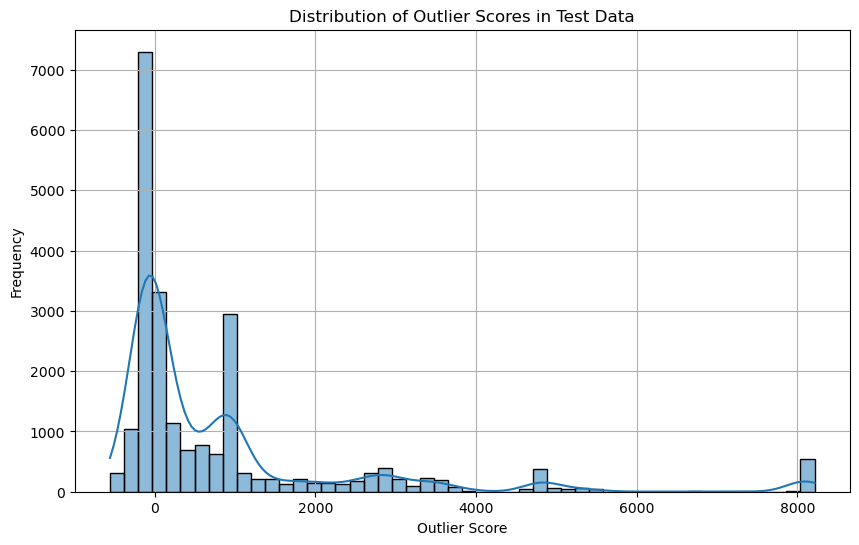

In [19]:
# Visualize the results
# Plot the outlier scores
plt.figure(figsize=(10, 6))
sns.histplot(outlier_scores_test, bins=50, kde=True)
plt.title("Distribution of Outlier Scores in Test Data")
plt.xlabel("Outlier Score")
plt.ylabel("Frequency")
plt.grid(True)
plt.show()

In [22]:
# When running this notebook with multiple threads, we got an error, 
# This needs to be solved

import multiprocessing

try:
    num_cpus = multiprocessing.cpu_count()
    print(f"Number of CPUs: {num_cpus}")
except Exception as e:
    print(f"An error occurred while retrieving the number of CPUs: {e}")

Number of CPUs: 16
